# **Real-Estate deals Data Analysis**
By Omer Tamary, April 2022

## Introduction
Objective : explore and analyze several neighborhoods in Tel Aviv which have a growth potential

We can break down this objective into four main components:
1. Data scraping from https://www.ad.co.il/nadlanprice website to create an extensive dataset of real-estate deals from the last 20 years using scrapy python library. 
2. Cleaning the dataset and organize it using "cleadnData.py" file
3. Conduct data analysis using numpy, matplotlib, seborn and pandas to extract relevant conclusions.
4. Implement machine learning tools with scikit python library.

#Preliminaries:
In this project we'll use the following python packages:

In [360]:
# Importing libraries we'll use
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn import ensemble
from sklearn.model_selection import KFold, cross_validate,train_test_split,cross_val_score
%matplotlib inline

# set numerical formmating
pd.set_option('float_format', '{:.2f}'.format)
pd.set_option("display.precision", 3)

#Phase 1
Using scrpy python library I was able to scrap raw dataset from https://www.ad.co.il/nadlanprice , all relevant code can be found in "nadlanScraper" folder.

Below is a sample from the raw dataset:

In [361]:
data_raw = pd.read_csv("dataset_raw.csv")
data_raw.head(10)

,address,area,buildYear,date,floor,numOfRooms,price,pricePerMeter,size
0,אחיעזר 10,התקווה,1950,11/1/2015,3,1.5,"1,290,000","18,125",32
1,נטעים 14,התקווה,1970,06/1/2015,2,2,"1,450,000","14,166",60
2,המכבש 10,התקווה,1950,04/1/2015,1,2.5,"950,000","7,894",57
3,בועז 25,התקווה,1950,01/1/2015,1,2,"1,500,000","10,526",57
4,רזי 3,התקווה,2012,01/1/2015,1,4,"1,500,000","19,843",64
5,כוכבי יצחק 3,שפירא,1975,22/7/2014,None,5,"970,000","17,300",100
6,לוינסקי 94,שפירא,2011,21/7/2014,None,2,"1,025,000","22,777",63
7,שדרות חכמי ישראל 7,שפירא,1980,15/7/2014,None,3,"399,996","12,666",75
8,שדרות חכמי ישראל 7,שפירא,None,15/7/2014,None,None,"401,602",None,None
9,לוינסקי 140,שפירא,1960,21/1/2021,2,3,"1,450,000","28,431",51


In [362]:
print("number of real-estate deals: ",data_raw.shape[0])

number of real-estate deals:  4997


#Phase 2
The main goal of this phase is to clean and organize the dataset using the "cleanData" file. <br> Here I will show the organized dataset and some general details about it:

In [363]:
data = pd.read_csv("dataset_ready.csv")
data.head(5)

,address,area,buildYear,date,floor,numOfRooms,price,pricePerMeter,size
0,אחיעזר 10,Hatikva,1950,11/1/2015,3.00,1.50,1290000,18125.00,32
1,נטעים 14,Hatikva,1970,06/1/2015,2.00,2.00,1450000,14166.00,60
2,המכבש 10,Hatikva,1950,04/1/2015,1.00,2.50,950000,7894.00,57
3,בועז 25,Hatikva,1950,01/1/2015,1.00,2.00,1500000,10526.00,57
4,רזי 3,Hatikva,2012,01/1/2015,1.00,4.00,1500000,19843.00,64


General details:

In [364]:
data.describe()

,buildYear,floor,numOfRooms,price,pricePerMeter,size
count,3655.00,2990.00,3655.00,3655.00,3595.00,3655.00
mean,1979.29,4.16,3.16,807494.56,12432.15,72.34
std,25.71,3.44,1.04,674097.97,12106.73,30.52
min,1901.00,1.00,1.00,10000.00,102.00,1.00
25%,1960.00,2.00,2.50,415000.00,6563.50,54.00
50%,1978.00,3.00,3.00,608902.00,8765.00,70.00
75%,2002.00,6.00,4.00,1068198.00,15985.00,94.00
max,2022.00,29.00,8.00,12650602.00,148830.00,238.00


Exploring missing and unique values:

In [365]:
print(data.isnull().sum())

address            0
area               0
buildYear          0
date               0
floor            665
numOfRooms         0
price              0
pricePerMeter     60
size               0
dtype: int64


Since the dataset has a total of 3655 rows, these values are insignificant. 

#Phase 3
We will start the data exploration process, which includes plotting the data according to certain parameters. We will pose questions based on the correlations we see. 

## Date Analysis
Let us first look at the data according to days, months and years.

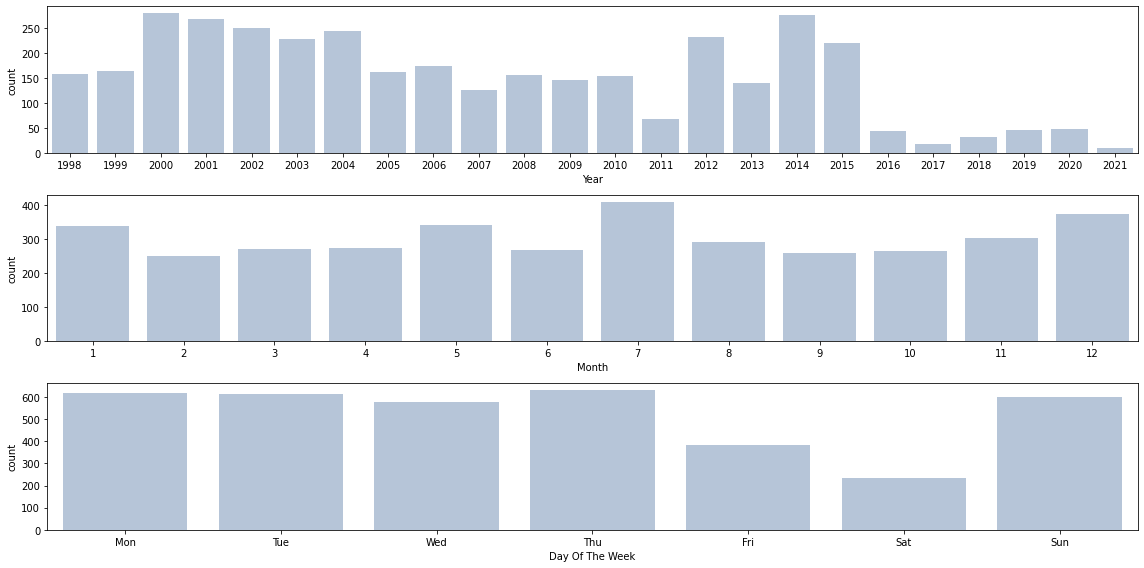

In [366]:
# Converting the date dtype from 'object' to 'datetime'
data['date'] = pd.to_datetime(data['date'], infer_datetime_format=True)
data_years = data['date'].dt.year
data_months = data['date'].dt.month
data_days = data['date'].dt.dayofweek
days_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Plotting the graphs
fig, axs = plt.subplots(ncols=1,nrows=3, figsize=(16,8))
ax0 = sns.countplot(x = data_years, ax=axs[0], color='lightsteelblue').set_xlabel('Year')
ax1 = sns.countplot(x =data_months, ax=axs[1], color='lightsteelblue').set_xlabel('Month')
ax2 = sns.countplot(x = data_days, ax=axs[2], color='lightsteelblue').set(xlabel='Day Of The Week', xticklabels=days_of_week)
plt.tight_layout()

*   Years - we can see that in the last five years, there are under 50 deals per year. This information is strange because we know that in the past five years the real-estate market has grown drastically. This suggests that the data retrieved from the website is not up-to-date. That's what happens in real life data analysis 😕 . <br>
Also we cannot see a specific pattern before 2015, so we can't extract relevant 
conclusions from this plot
<br><br>
*   Months - we can clearly notice that July is the most popular in terms of number of real-estate deals. This is the case as it is the end of the school year and families have more time to invest in moving house.
<br><br>
*   Days - the weekend (Friday and Saturday) is the least popular time to close a deal, maybe due to the lack of work professionals (banks, lawyers etc.).

### Neighborhood Analysis
First, let's see the number of realestate deals in each neighborhood:

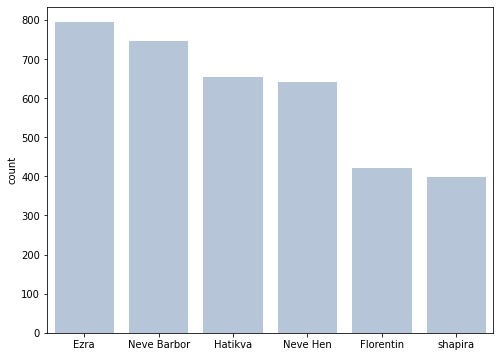

In [367]:
fig = sns.countplot(x=data['area'].values , data = data,order = data['area'].value_counts().index,color='lightsteelblue')
plt.gcf().set_size_inches(8,6)

We can see that the number of real-estates deals is quite similar, so we can conclude that the data analysis process won't be affected by quantative differences. 

### Price per square meter for each neighborhood over the last 20 years

In [ ]:
#because there is not much information from 2016-2022 I decide to not include it in this Analsys
data = data.loc[data["date"].dt.year <2015]

# group by neighborhood
areas = data.groupby(['area'])
listOfKeys = list(areas.groups.keys())

# plot the graphs
fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(16,8))
tmp = 0
for row in range(2):
    for col in range(3):
        area = areas.get_group(listOfKeys[tmp])
        axs[row,col] = sns.regplot(data = area, y = "pricePerMeter", x = area["date"].dt.year ,ax=axs[row,col], order=3,line_kws={"color": "red"})        
        axs[row,col].set_title(listOfKeys[tmp])
        tmp+=1

plt.tight_layout()

*   Neve Barabor and Florentin has the sharpest growth in real-estate prices.

*   Hatikva and Neve Hen has the slowest growth rate in comparison to all the other neighborhoods. 

*   Ezra has the Highest volatility in terms of price growth over the years.

 Let's check if we can find convincing explanations to these insights.


### Distribution of build year according to neighborhood

In [ ]:
# group by neighborhood
areas = data.groupby(['area'])
listOfKeys = list(areas.groups.keys())
fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(16,8))
tmp = 0

#plot the graphs
for row in range(2):
    for col in range(3):
        area = areas.get_group(listOfKeys[tmp])
        axs[row,col] = sns.histplot( x = area["buildYear"] ,ax=axs[row,col],kde=True,stat="density", linewidth=0)
        axs[row,col].set_title(listOfKeys[tmp])
        #axs[row,col].yaxis.get_major_formatter().set_scientific(False)
        #axs[row,col].yaxis.get_major_formatter().set_useOffset(False)
        
        tmp+=1
        
plt.tight_layout()


Can this plot explain the price growth?

*    In the Hatikva graph we notice that most of the buildings were built in 1940-1970. Therefore we can assume that Hatikva is an old and underdeveloped neighborhood, which can explain why the price growth is small as seen in the previous graph.
<br><br>
*   As we can see, in the last twenty years the number of construction projects in the Florentin has increased significantly. This may be an indicator that this neighborhood is developing and explain the sharp growth in price per meter over the years.
<br><br>
*   Ezra neighborhood has a trend similar to Florentin - a raise in construction projects in the last ten years affecting the price growth in this neighborhood.




Real-estate deals in each neighborhood over time

In [ ]:
# group by neighborhood
areas = data.groupby(['area'])
listOfKeys = list(areas.groups.keys())
fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(16,8))
tmp = 0

#plot the graphs
for row in range(2):
    for col in range(3):
        area = areas.get_group(listOfKeys[tmp])
        axs[row,col] = sns.histplot(x = area["date"].dt.year,ax=axs[row,col],stat="percent",color='lightsteelblue')
        axs[row,col].set_title(listOfKeys[tmp])        
        axs[row,col].set(xticks=list(range(1998,2016,2)))

        tmp+=1
        
plt.tight_layout()



*   High demands in Florentin over the last 10 years can explain the increase in price, demand which grew in correlation with the increase in new building projects we saw previously in this neighborhood. 
<br><br>
*   The number of real-estate deals in Neve Hen is in constant decline, this can explain the slow growth in price. This is a classic situation of high supply and low demand. 
<br><br>
*   In Ezra neighborhood more than 40% of the deals took place between 2011 and 2015, in correlation to the rise in price growth that we saw before.







###Correlation heatmap
In order to continue the analysis, we will check if there are a strong corellations between various numerical features.

In [ ]:
# let's create correlation map to understand if ther is 
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool_))
heatmap = sns.heatmap(data.corr(),mask=mask, vmin=-1, vmax=1, annot=True, cmap="rocket_r")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

There is a clear corellation between the size of the house and the number of rooms, but this is not an interesting corellation because it's obvious - they are in direct proportion.
Let us analyze other relations.

###Size and number of rooms correlation


To start the analysis, we need to check which number of rooms most frequent.

In [ ]:
fig = sns.countplot(x=data["numOfRooms"] , data = data,color='lightsteelblue')

There are more than 600 real-estate deals 2-4 rooms, therefore we will check the change over time in those real-estate deals.

In [ ]:
#create dateframes for numOfRooms = 2,3,4
data_3_5 = data.loc[(data["numOfRooms"] ==2) | (data["numOfRooms"] ==3) | (data["numOfRooms"] ==4)]

#plot graph
plt.figure(figsize=(16,8))
sns.lineplot(x="buildYear", y="size",hue="numOfRooms", data = data_3_5)

I tried to find the tendency using lineplot, but I wasn't able to extract a specific conclusion from this plot.
<br>
Let's approach it from a diffrent way.

In [ ]:
#create dataframes for 2,3,4 number of rooms
data_2 = data.loc[data["numOfRooms"] == 2]
data_3 = data.loc[data["numOfRooms"] == 3]
data_4 = data.loc[data["numOfRooms"] == 4]

#plot graphs
fig, axs = plt.subplots(3,figsize=(12,8))
ax0 = sns.regplot(data = data_2, y = "size", x = data_2["buildYear"] ,ax=axs[0],line_kws={"color": "red"}).set_title('2 Rooms')
ax1 = sns.regplot(data = data_3, y = "size", x = data_3["buildYear"] ,ax=axs[1],line_kws={"color": "red"}).set_title('3 Rooms')
ax2 = sns.regplot(data = data_4, y = "size", x = data_4["buildYear"] ,ax=axs[2],line_kws={"color": "red"}).set_title('4 Rooms')

plt.tight_layout()

In these plots there is a clear tendency - over the years, houses with 3 or 4 rooms were built as bigger houses, in terms of overall size. A possible explantion for this is the fact that these neighborhoods were considered as poor neighborhoods, therefore the size of the appartments were smaller and cheaper. The increase in size over the years may be due to the overall development of Tel Aviv and the rise of demand for bigger houses.

###Analysis by floor

In [ ]:
df = data.dropna()

fig, axs = plt.subplots(nrows = 1 , ncols = 3,figsize=(16,8))
axs0 = sns.lineplot(x="buildYear", y="floor",data = df,ax=axs[0])
axs1 = sns.countplot(y="floor", data = df,ax=axs[1],color='lightsteelblue')
axs2 = sns.barplot(y="floor", x=df["date"].dt.year ,data = df,ax=axs[2],ci=None,color='lightsteelblue').tick_params(axis='x', rotation=90)

plt.tight_layout()

*   Graph 1 - In the past, buildings in Tel-Aviv would not be taller than 4 floors. However, due to the growth of the population and increase in demand to live in the city, many older buildings have now been destroyed and rebuilt with more stories. 
*   Graph 2 - Following my previous explantation, the rebuilding of building in the city is continuing, however most of the buildings in these neighborhoods are not tall.
*   Graph 3 - during 2014-2018 there were numerous deals in higher floors on average, possibly due to new construcion projects sold in said period.





#Phase 4

##Prediction
Objective: predict house size

In [ ]:
data_p = data.copy()

Overview corellation between features

In [ ]:
sns.pairplot(data_p)
plt.tight_layout()

###Data cleaning

Check NaN values in dataframe

In [ ]:
data_p.isnull().sum()

Update pricePerMeter feature in datafarme

In [ ]:
data_p['pricePerMeter'] = data_p['price'] / data_p['size']  

Set to each row without floor value the median floor value

In [ ]:
data_p[['floor']]=data_p[['floor']].fillna(data_p['floor'].mean())

In [ ]:
data_p.shape

In [ ]:
data_p.isnull().sum()

###First let's check our features destrabution:





In [ ]:
fig , axes =  plt.subplots(3,2, figsize=(12,12))
#plot graphs
for i,feature in enumerate(['buildYear','price','floor','numOfRooms','size','pricePerMeter']):
  if i > 2:
    i -= 3
    j = 1
  else:
    j = 0
  sns.histplot(data_p[feature], ax = axes[i][j])

plt.tight_layout()

we can see that some numerical featuers aren't normally destrabuted' so let's use log function for it:

In [ ]:
data_p['size'] = np.log(data['size'])
data_p['price'] = np.log(data['price'])
data_p['pricePerMeter'] = np.log(data['pricePerMeter'])
data_p['floor'] = np.log(data['floor'])
data_p['numOfRooms'] = np.log(data['numOfRooms'])

Adding year deal from date colunm and houseAge

In [ ]:
data_p["dateYear"]= data_p["date"].dt.year
data_p["houseAge"]= data_p["dateYear"] - data_p["buildYear"]

Check liner corellation between featuers

In [ ]:
fig , axes =  plt.subplots(3,2, figsize=(12,12))
#plot graphs
for i,feature in enumerate(['houseAge','dateYear','price','floor','numOfRooms','pricePerMeter']):
  if i > 2:
    i -= 3
    j = 1
  else:
    j = 0
  sns.regplot(x = data_p[feature],y = data_p['size'], ax = axes[i][j])

plt.tight_layout()

clean outliners









In [ ]:
outlier_index = data_p[(data_p['size'] < 2.5) | (data_p['size'] > 5.4)].index
data_p.drop(outlier_index, axis=0, inplace=True)
outlier_index = data_p[(data_p['pricePerMeter'] > 11)].index
data_p.drop(outlier_index, axis=0, inplace=True)
outlier_index = data_p[(data_p['price'] > 15)].index
data_p.drop(outlier_index, axis=0, inplace=True)

plot graphs after changes

In [ ]:
fig , axes =  plt.subplots(3,2, figsize=(12,12))
data_p = data_p.dropna()
for i,feature in enumerate(['houseAge','dateYear','price','floor','numOfRooms','pricePerMeter',]):
  if i > 2:
    i -= 3
    j = 1
  else:
    j = 0
  sns.regplot(x = data_p[feature],y = data_p['size'], ax = axes[i][j])

plt.tight_layout()

In [ ]:
#feature Engineering
data_p["floor&Rooms"] = data_p["floor"] * (data_p["numOfRooms"])

It's clear there is no corellation between the size of the house to  year deal.

corellation between numerical features

In [ ]:
# get numerical features
numerical_features = data_p.select_dtypes(include=[np.number])

#corretation between the feature and target
corr = numerical_features.corr()
print(corr['size'].sort_values(ascending=False)[:], '\n')

### area analysis

In [ ]:
sns.countplot(x="area", data=data_p)

In [ ]:
sns.catplot(x='area', y='size', data=data_p, kind='box', aspect=2)

In [ ]:
size_pivot = data_p.pivot_table(index='area',values='size', aggfunc=np.median)
size_pivot.plot(kind='bar')
plt.xlabel('area')
plt.ylabel('Median size')
plt.xticks(rotation=45)

We can see that Ezra area has the largest houses and Florentin has the smallest, therefore we will encode and add new colunms to the dataframe.

In [ ]:
def encode(x): return 1 if x == 'Ezra' else 0
data_p['enc_Ezra'] = data_p.area.apply(encode)

In [ ]:
size_pivot = data_p.pivot_table(index='enc_Ezra', values='size', aggfunc=np.median)
size_pivot.plot(kind='bar')
plt.xlabel('Encoded Ezra')
plt.ylabel('Median size')
plt.xticks(rotation=0)

In [ ]:
def encode(x): return 1 if x == 'Florentin' else 0
data_p['enc_Florentin'] = data_p.area.apply(encode)

In [ ]:
size_pivot = data_p.pivot_table(index='enc_Florentin', values='size', aggfunc=np.median)
size_pivot.plot(kind='bar')
plt.xlabel('Encoded Florentin')
plt.ylabel('Median size')
plt.xticks(rotation=0)

###organize data

In [ ]:
#create targe colunm in the the right column (price)
data_p["target"] = data_p["size"]
data_p = data_p.drop(["size"], axis=1)

data_p = data_p.reset_index(drop=True)
data_p.head(5)


### Train & Predict

In [ ]:
# set X and Y
X = data_p[['floor&Rooms','houseAge','numOfRooms','floor','price','enc_Ezra','enc_Florentin']].to_numpy()
Y = data_p['target'].to_numpy()

#normalize the data
X = StandardScaler().fit_transform(X)


In [ ]:
#create LinearRegression object 
model = linear_model.LinearRegression()
RFmodel = ensemble.RandomForestRegressor(n_estimators = 400, oob_score = True, n_jobs = -1,random_state =50,max_features = "sqrt", min_samples_leaf = 2)
GBmodel = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,learning_rate = 0.01, loss = 'squared_error')

#set train and test groups
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.3,random_state =42)

#train model
model.fit(x_train,y_train)
RFmodel.fit(x_train,y_train)
GBmodel.fit(x_train,y_train)

#shape of train and test
print(x_train.shape)
print(x_test.shape)

In [ ]:
# get coef and intercept data of the linear equation 
print(model.coef_, model.intercept_)

In [ ]:
# accuracy of the LinearRegression model
print(model.score(x_test,y_test))
y_pred = model.predict(x_test)
sns.regplot(x = y_pred ,y = y_test)

In [ ]:
# accuracy of the Gradient Boosting Regressorion model
print(RFmodel.score(x_test,y_test))
y_pred = RFmodel.predict(x_test)
sns.regplot(x = y_pred ,y = y_test)

In [ ]:
# accuracy of the Gradient Boosting Regressorion model
print(GBmodel.score(x_test,y_test))
y_pred = GBmodel.predict(x_test)
sns.regplot(x = y_pred ,y = y_test)

Cross validation using KFold for Gradient Boosting Regressorion model

In [ ]:
kf = KFold(n_splits=2)
kf.get_n_splits(X)

KFold(n_splits=2, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X):
  print("TRAIN:", train_index, "TEST:", test_index)
  x_train, x_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]

scoring=('r2', 'neg_mean_squared_error')
cv_results = cross_validate(GBmodel, X, Y,  cv=kf, scoring=scoring, return_train_score=False)

print(cv_results)
scores = cross_val_score(GBmodel, X, Y, cv=4)
print(np.average(scores))